<center> <h1>Workshop: A/B Testing</h1> </center> 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

### 1. Setup

In this file, we will analyze data from an A/B test designed to study advertising effectiveness.

#### Download data/script files and launch Jupyter Notebook
1.	Create a new file folder on your computer
2.	Download the file “AB_test_advertising.csv” from Canvas to your folder
3.	Make sure the current notebook is in the same folder


### 2. Descriptive Analysis


#### 2.1 First look at the data
Load the data and use AB_test as the name for the data frame. Eyeball the variables in the data frame by using the data_frame.head() command.

In [5]:
#load the dataframe and use ab_test as the name for the dataframe
ab_test = pd.read_csv('AB_test_advertising.csv')

#check the first 5 rows of the dataframe
ab_test.head()

,user_id,treatment,revenue,gender,stateID,age,browser,facebook_login,revenuePrevYear
0,1,1,0.0,Male,3,22,Other,0,4636.9302
1,2,0,0.0,Male,38,22,Explorer,0,6504.2603
2,3,0,0.0,Male,21,22,Chrome,0,5164.5303
3,4,0,0.0,Male,3,23,Other,0,5366.8101
4,5,1,0.0,Male,24,23,Chrome,0,5795.8301


**Q:** Add code to the chunk below to summarize the data frame using the command frame_name.describe(). Make sure you understand what the different variables refer to and which values they take on. How many observations are there? What is the unit of observation?

In [9]:
#describe the dataframe
print(ab_test.describe())

#check the info of the dataframe
print(ab_test.info())

#shape of the dataframe
print(ab_test.shape)

              user_id      treatment         revenue         stateID  \
count  1000000.000000  1000000.00000  1000000.000000  1000000.000000   
mean    500000.500000        0.50022       10.169842       25.512115   
std     288675.278933        0.50000      276.990538       14.433331   
min          1.000000        0.00000        0.000000        1.000000   
25%     250000.750000        0.00000        0.000000       13.000000   
50%     500000.500000        1.00000        0.000000       25.000000   
75%     750000.250000        1.00000        0.000000       38.000000   
max    1000000.000000        1.00000   140464.830000       50.000000   

                  age  facebook_login  revenuePrevYear  
count  1000000.000000  1000000.000000     1.000000e+06  
mean        22.011306        0.240081     5.413937e+03  
std          0.725652        0.427133     3.472124e+03  
min         21.000000        0.000000     0.000000e+00  
25%         22.000000        0.000000     4.636470e+03  
50%      

#### 2.2 A closer look at the revenue variable

The summary command includes descriptive statistics for the revenue variable. Explore the variation in this variable further using a histogram with 100 bins.

count    1000000.000000
mean          10.169842
std          276.990538
min            0.000000
25%            0.000000
50%            0.000000
75%            0.000000
max       140464.830000
Name: revenue, dtype: float64


(array([9.98747e+05, 7.53000e+02, 2.31000e+02, 9.70000e+01, 5.20000e+01,
        2.70000e+01, 1.50000e+01, 1.80000e+01, 9.00000e+00, 6.00000e+00,
        2.00000e+00, 3.00000e+00, 5.00000e+00, 6.00000e+00, 2.00000e+00,
        3.00000e+00, 1.00000e+00, 1.00000e+00, 2.00000e+00, 2.00000e+00,
        2.00000e+00, 2.00000e+00, 0.00000e+00, 0.00000e+00, 4.00000e+00,
        1.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 2.00000e+00,
        2.00000e+00, 0.00000e+00, 1.00000e+00, 1.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00

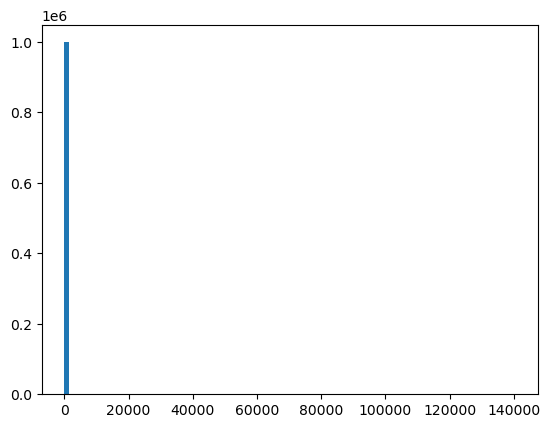

In [16]:
#The summary command includes descriptive statistics for the revenue variable. 
print(ab_test.revenue.describe())

#Explore the variation in this variable further using a histogram with 100 bins.
plt.hist(ab_test.revenue, bins=100)


This histogram is hard to read because the distribution of revenue is very skewed. We thus focus on values of revenue above 0 and below 100. We can do this by filtering the data frame by using conditional statements.

(array([2537., 2331., 2013., 1746., 1495., 1355., 1242., 1096., 1020.,
         966.,  864.,  825.,  814.,  714.,  708.,  660.,  611.,  601.,
         534.,  521.,  496.,  469.,  408.,  431.,  445.,  416.,  421.,
         377.,  384.,  378.,  328.,  318.,  288.,  278.,  304.,  304.,
         250.,  264.,  251.,  255.,  254.,  249.,  245.,  230.,  219.,
         226.,  208.,  211.,  200.,  195.,  203.,  198.,  169.,  170.,
         167.,  165.,  144.,  168.,  177.,  145.,  138.,  145.,  158.,
         149.,  128.,  148.,  127.,  136.,  141.,  133.,  122.,  122.,
         135.,  125.,  126.,  112.,  127.,  110.,  105.,  111.,   96.,
         106.,  111.,   97.,  109.,  104.,  107.,  104.,   91.,   88.,
         108.,   93.,   72.,   95.,   73.,   81.,   71.,   84.,   95.,
          88.]),
 array([9.99999980e-03, 1.00979998e+00, 2.00959996e+00, 3.00939994e+00,
        4.00919992e+00, 5.00899990e+00, 6.00879988e+00, 7.00859986e+00,
        8.00839984e+00, 9.00819982e+00, 1.00079998e+01, 1.

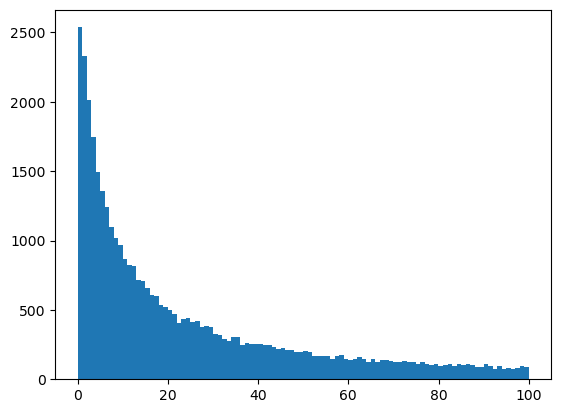

In [35]:
#Filter the values of revenue above 0 and below 100.
ab_test_filter = ab_test.loc[(ab_test.revenue > 0) & (ab_test.revenue < 100)]
plt.hist(ab_test_filter.revenue, bins=100)

Next, generate a variable that is equal to one if revenue is positive and zero when no purchase occurred.

**Q:** Add code to the chunk below to compute the proportion of consumers that made a purchase. What is this proportion?

In [40]:
# Generate a variable that is equal to one if revenue is positive and zero when no purchase occurred.
ab_test['purchase_dummy'] = 0
ab_test.loc[ab_test.revenue > 0, 'purchase_dummy'] = 1

# Compute the proportion of consumers that made a purchase. What is this proportion?
print(len(ab_test.loc[ab_test.purchase_dummy == 1])/len(ab_test))

0.051486


### 3. Checking randomization
You want to verify that the A/B test was actually implemented correctly. You know that if randomization is done correctly, the treatment variable should be uncorrelated with consumer demographics. Implement a regression that tests whether gender, age, and facebook_login are correlated with treatment.

**Q:** Can you reject the null hypothesis that these three variables do not predict treatment (try to test for the correlation / influence of all three variables in one single regression)?

In [38]:
# Implement a regression that tests whether gender, age, and facebook_login are correlated with treatment.

# Define the regression formula
formula = "treatment ~ gender + age + facebook_login"

# Fit the regression model
model = smf.ols(formula=formula, data=ab_test).fit()

# Print the regression summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              treatment   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.4931
Date:                Mon, 22 Jan 2024   Prob (F-statistic):              0.687
Time:                        15:10:43   Log-Likelihood:            -7.2579e+05
No. Observations:             1000000   AIC:                         1.452e+06
Df Residuals:                  999996   BIC:                         1.452e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.5040      0.015     32.

### 4. Simple A/B test

#### 4.1 Revenue regression

**Q:** Fill in the chunk below with code that regresses revenue on treatment in order to test whether treatment (showing an ad) has a significant effect on revenue generated. Interpret the intercept and the treatment coefficients. Is the difference in revenue between treatment and control group statistically significant?


In [39]:
# Define the regression formula
formula = "revenue ~ treatment"

# Fit the regression model
model = smf.ols(formula=formula, data=ab_test).fit()

# Print the regression summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     2.349
Date:                Mon, 22 Jan 2024   Prob (F-statistic):              0.125
Time:                        15:16:52   Log-Likelihood:            -7.0429e+06
No. Observations:             1000000   AIC:                         1.409e+07
Df Residuals:                  999998   BIC:                         1.409e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.7451      0.392     24.872      0.0

#### 4.2 Purchase dummy regression

**Q:** Fill in the chunk below with code that, instead of revenue, uses the purchase_dummy as the outcome variable and regresses it on treatment. Interpret the intercept value and the treatment coefficient in this regression. Is the difference in purchase probabilities between treatment and control group statistically significant? Compare the results from this regression to the previous regression. Why does the level of precision differ?

In [41]:
# Define the regression formula
formula = "purchase_dummy ~ treatment"

# Fit the regression model
model = smf.ols(formula=formula, data=ab_test).fit()

# Print the regression summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         purchase_dummy   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     41.60
Date:                Mon, 22 Jan 2024   Prob (F-statistic):           1.12e-10
Time:                        15:18:13   Log-Likelihood:                 90734.
No. Observations:             1000000   AIC:                        -1.815e+05
Df Residuals:                  999998   BIC:                        -1.814e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0501      0.000    160.148      0.0

### 5. A/B test with control variables

We now regress revenue on treatment as well as ALL demographic variables.

In [42]:
# Define the regression formula
formula = "revenue ~ treatment + gender + age + facebook_login"

# Fit the regression model
model = smf.ols(formula=formula, data=ab_test).fit()

# Print the regression summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.044
Model:                            OLS   Adj. R-squared:                  0.044
Method:                 Least Squares   F-statistic:                 1.163e+04
Date:                Mon, 22 Jan 2024   Prob (F-statistic):               0.00
Time:                        15:20:37   Log-Likelihood:            -7.0202e+06
No. Observations:             1000000   AIC:                         1.404e+07
Df Residuals:                  999995   BIC:                         1.404e+07
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -1002.6944      8.320   -120.

**Q:** Compare the coefficient on treatment from this regression with the treatment coefficient from the simple A/B-test regression without controls. Did you expect this difference / lack of difference in the coefficients?

Yes there is a difference.

### 6. Optimal sample size calculation

For this question, assume that an ad effect of at least 0.5 dollars is profitable. Taking the estimate of the ad effect from the univariate regression in section 4.1 as a benchmark, how large would the sample size have to be so that 0.5 is outside the 97.5 percent one-sided confidence interval for the true ad effect? For the value of $s^2$ that you need to pick in this computation, consider both:

1. the variance of Y;
2. the variance of the residual from a regression of Y on all control variables (except the treatment).

**Q:** Add code in the chunk below that computes the variance of the revenue variable.

In [48]:
# Compute the variance of the revenue variable
s2_y = ab_test.revenue.var()

Compute the variance of the residual from a regression of $Y$ on all controls.

In [49]:
# Regression of revenue on all control variables (except the treatment)
# Define the regression formula
formula = "revenue ~ gender + age + facebook_login"

# Fit the regression model
model = smf.ols(formula=formula, data=ab_test).fit()

# Print the regression summary
print(model.summary())

# Compute the variance of the residual from a regression of revenue on all controls
s2_resid = model.resid.var()

                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.044
Model:                            OLS   Adj. R-squared:                  0.044
Method:                 Least Squares   F-statistic:                 1.550e+04
Date:                Mon, 22 Jan 2024   Prob (F-statistic):               0.00
Time:                        15:45:10   Log-Likelihood:            -7.0202e+06
No. Observations:             1000000   AIC:                         1.404e+07
Df Residuals:                  999996   BIC:                         1.404e+07
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -1002.2428      8.315   -120.

**Q:** What is the variance of the residuals? Compare the two estimates of $s^2$ and explain why one is larger than the other.


**Q:** Now compute the optimal sample sizes for both estimates of $s^2$. 

In [51]:
# Compute the optimal sample sizes for both estimates of s^2

effect_size = 0.05

sample_size_y = 2 * s2_y / effect_size**2
sample_size_resid = 2 * s2_resid / effect_size**2

sample_size_y, sample_size_resid



(61379006.38831452, 58650997.47829154)